In [3]:
from matplotlib import pyplot as plt
from scipy import stats as stats
import pandas as pd
import numpy as np

In [4]:
odds_data=pd.read_pickle('Odds_Data.pkl')
print(odds_data.shape)
odds_data=odds_data.dropna(subset=['Away_Pitcher','Home_Pitcher'])
odds_data.shape

(13649, 15)


(13607, 15)

In [5]:
odds_split=odds_data.OVER.value_counts()
odds_split

False    7197
True     6410
Name: OVER, dtype: int64

<AxesSubplot:title={'center':'Gambling Outcomes (2015-2021)'}>

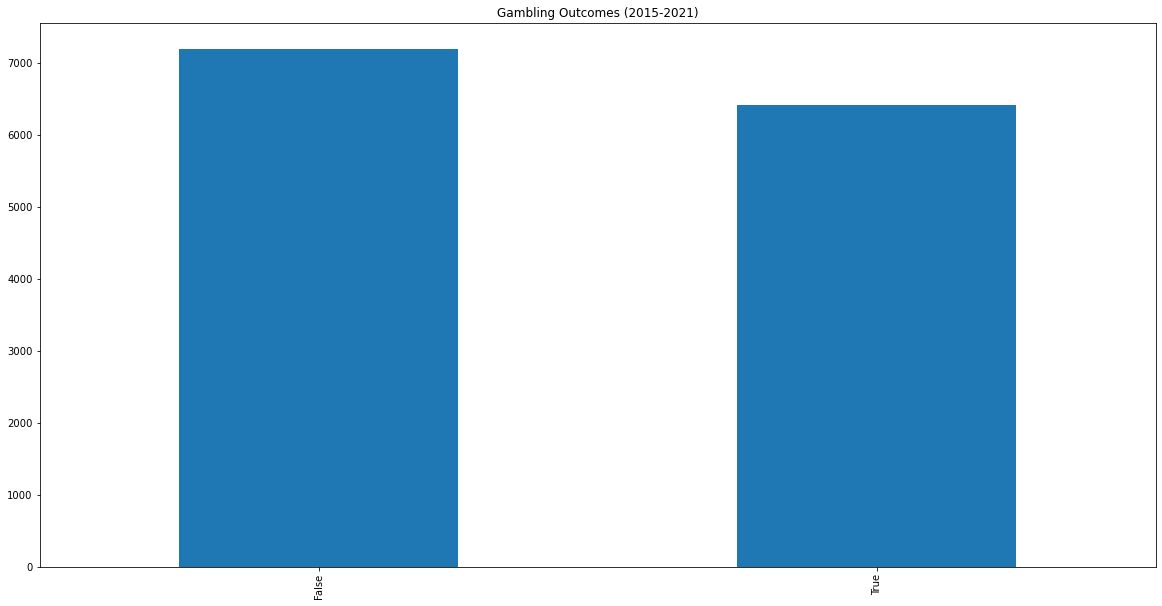

In [6]:
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Gambling Outcomes (2015-2021)')

odds_split.plot.bar(ax=ax)

In [7]:
A=odds_data.Away_Pitcher.value_counts()
H=odds_data.Home_Pitcher.value_counts()
Pitchers=pd.concat([A,H],axis=1).fillna(0)
Pitchers['Total_Starts']=Pitchers.Away_Pitcher+Pitchers.Home_Pitcher

In [8]:
Pitchers

,Away_Pitcher,Home_Pitcher,Total_Starts
ASANCHEZ,121.0,119.0,240.0
JARRIETA,96.0,76.0,172.0
MSCHERZER,90.0,96.0,186.0
GCOLE,90.0,87.0,177.0
ZGREINKE,88.0,96.0,184.0
...,...,...,...
TDANISH,0.0,1.0,1.0
CSCHMIDT,0.0,1.0,1.0
RCASTELLA,0.0,1.0,1.0
YPINO,0.0,1.0,1.0


In [9]:
Pitchers.Total_Starts.nlargest(25)

ASANCHEZ     240.0
MSCHERZER    186.0
ZGREINKE     184.0
JLESTER      183.0
GCOLE        177.0
RPORCELLO    174.0
TBAUER       174.0
JARRIETA     172.0
CANDERSON    172.0
JDEGROM      172.0
JTEHERAN     169.0
CKERSHAW     168.0
JQUINTANA    167.0
JHAPP        167.0
KGIBSON      166.0
DKEUCHEL     164.0
MTANAKA      162.0
JODORIZZI    161.0
MFIERS       160.0
PCORBIN      157.0
WMILEY       156.0
RRAY         155.0
GGONZALEZ    152.0
CARCHER      151.0
CHAMELS      150.0
Name: Total_Starts, dtype: float64

In [10]:
Pitchers.Total_Starts.value_counts().sort_index()

1.0      120
2.0       60
3.0       44
4.0       30
5.0       30
        ... 
177.0      1
183.0      1
184.0      1
186.0      1
240.0      1
Name: Total_Starts, Length: 143, dtype: int64

<AxesSubplot:title={'center':'Pitching Frequencies (2015-2021)'}, ylabel='Frequency'>

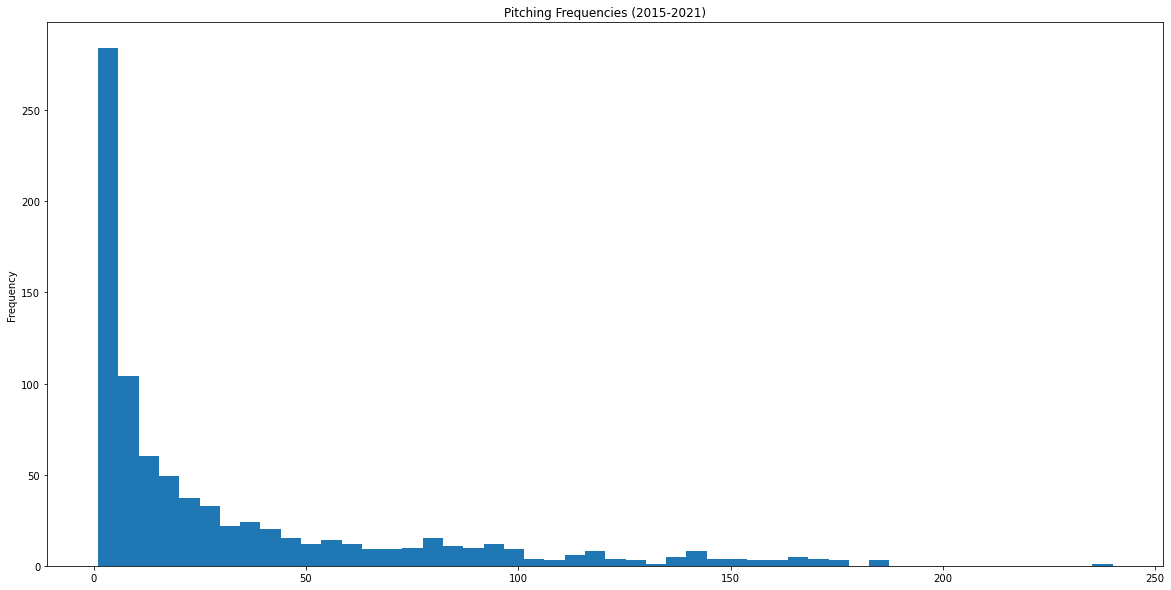

In [11]:
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Pitching Frequencies (2015-2021)')
Pitchers.Total_Starts.plot.hist(bins=50,ax=ax)

In [12]:
#period_starts
odds_data['away_pitcher_starts']=odds_data.apply(lambda x:Pitchers.loc[x.Away_Pitcher].Total_Starts,axis=1)
odds_data['home_pitcher_starts']=odds_data.apply(lambda x:Pitchers.loc[x.Home_Pitcher].Total_Starts,axis=1)

In [18]:
odds_data.home_pitcher_starts

0          7.0
1        146.0
2        109.0
3        114.0
4         96.0
         ...  
13644     93.0
13645    121.0
13646     48.0
13647    117.0
13648    117.0
Name: home_pitcher_starts, Length: 13607, dtype: float64

In [13]:
odds_data['Collective_Exp']=(odds_data.away_pitcher_starts*odds_data.home_pitcher_starts)/(odds_data.away_pitcher_starts+odds_data.home_pitcher_starts)

In [21]:
odds_data.OVER

0         True
1        False
2         True
3         True
4         True
         ...  
13644     True
13645     True
13646     True
13647     True
13648     True
Name: OVER, Length: 13607, dtype: bool

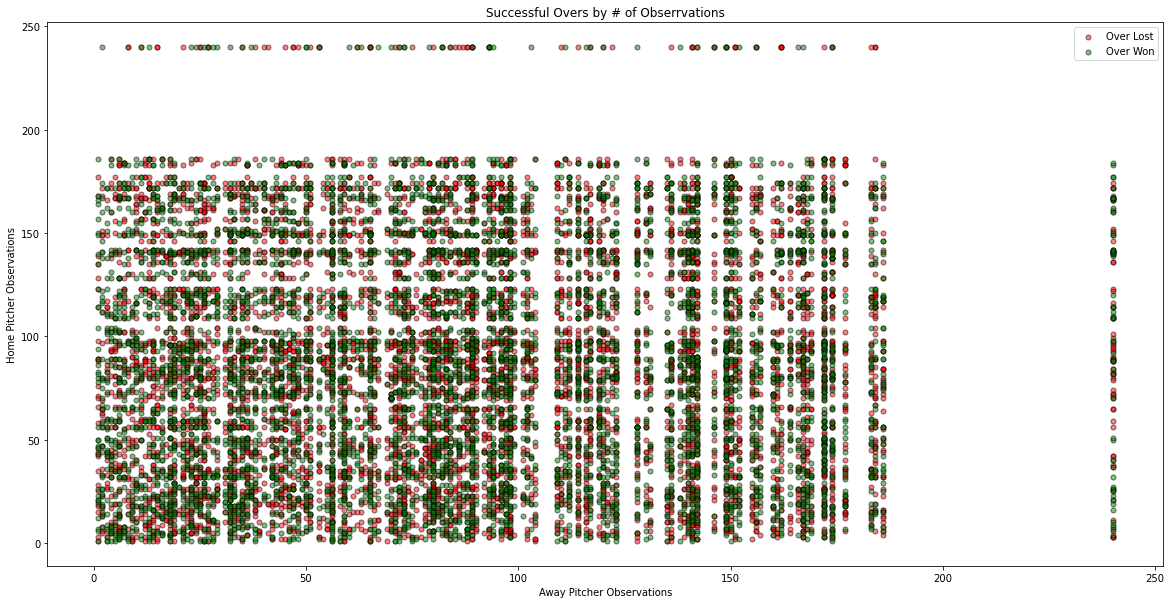

In [30]:
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Successful Overs by # of Obserrvations')
ax.scatter(x=odds_data[odds_data['OVER']==False]['away_pitcher_starts'],
           y=odds_data[odds_data['OVER']==False]['home_pitcher_starts'],
           alpha = .5,edgecolor= 'black',  c = 'red', s= 25, label = 'Over Lost')

ax.scatter(x=odds_data[odds_data['OVER']==True]['away_pitcher_starts'],
           y=odds_data[odds_data['OVER']==True]['home_pitcher_starts'],
           alpha = .5,edgecolor= 'black',  c = 'green', s= 25, label = 'Over Won')
ax.set_xlabel('Away Pitcher Observations');
ax.set_ylabel('Home Pitcher Observations');
ax.legend();

In [36]:
by_ATeam=odds_data.groupby(['Away_Team']).OVER.agg(['sum','count','mean'])
by_HTeam=odds_data.groupby(['Home_Team']).OVER.agg(['sum','count','mean'])
by_APitcher=odds_data.groupby(['Away_Pitcher']).OVER.agg(['sum','count','mean'])
by_HPitcher=odds_data.groupby(['Home_Pitcher']).OVER.agg(['sum','count','mean'])

In [53]:
by_HTeam

,sum,count,mean
Home_Team,,,
ARI,226,448,0.504464
ATL,220,454,0.484581
BAL,206,449,0.458797
BOS,229,460,0.497826
CHC,196,471,0.416136
CIN,233,451,0.516630
CLE,224,459,0.488017
COL,207,453,0.456954
CWS,198,449,0.440980


In [37]:
by_Team=by_ATeam+by_HTeam
by_Team['mean']=by_Team['sum']/by_Team['count']

In [38]:
by_Team

,sum,count,mean
Away_Team,,,
ARI,434,903,0.480620
ATL,445,907,0.490628
BAL,416,901,0.461709
BOS,458,920,0.497826
CHC,420,937,0.448239
CIN,435,897,0.484950
CLE,412,919,0.448313
COL,403,906,0.444812
CWS,417,897,0.464883


In [43]:
by_Pitcher=by_APitcher.add(by_HPitcher,fill_value=0)
by_Pitcher['mean']=by_Pitcher['sum']/by_Pitcher['count']

In [29]:
print(by_HPitcher.shape)
print(by_APitcher.shape)
print(by_Pitcher.shape)

(766, 3)
(767, 3)
(843, 3)


In [52]:
by_Pitcher[(by_Pitcher['count']>50 ) & (by_Pitcher['mean']>0.55)]

,sum,count,mean
ACONLEY,33.0,56.0,0.589286
DSTRAILY,57.0,98.0,0.581633
JCUETO,67.0,121.0,0.553719
JLOCKE,35.0,56.0,0.625000
LSEVERINO,54.0,96.0,0.562500
MFRIED,30.0,53.0,0.566038
MWACHA,75.0,135.0,0.555556
TCAHILL,34.0,59.0,0.576271
TMILONE,35.0,62.0,0.564516
WPERALTA,29.0,51.0,0.568627


In [31]:
pitchers=['Conley','Straily','Cueto','Locke','Severino','Fried','Wacha','Cahill','Milone','Peralta']

In [44]:
odds_data.groupby(['CloseOU']).OVER.agg(['sum','count','mean'])

,sum,count,mean
CloseOU,,,
5.0,2,3,0.666667
5.5,9,18,0.500000
6.0,38,94,0.404255
6.5,186,340,0.547059
7.0,494,1097,0.450319
7.5,979,1859,0.526627
8.0,956,2008,0.476096
8.5,1238,2634,0.470008
9.0,1089,2495,0.436473


In [45]:
odds_data.groupby(['year']).OVER.agg(['sum','count','mean'])

,sum,count,mean
year,,,
2015,1195,2465,0.484787
2016,1167,2462,0.474005
2017,1148,2467,0.465343
2018,1137,2464,0.461445
2019,1156,2462,0.469537
2020,422,893,0.472564
2021,209,436,0.479358


In [46]:
odds_data.groupby(['month']).OVER.agg(['sum','count','mean'])

,sum,count,mean
month,,,
3,41,90,0.455556
4,1059,2196,0.482240
5,1038,2157,0.481224
6,960,2028,0.473373
7,880,1974,0.445795
8,1194,2499,0.477791
9,1144,2423,0.472142
10,115,279,0.412186
11,3,3,1.000000


In [55]:
Hteams_years=odds_data.pivot_table(['OVER'],index=['Home_Team'],columns=['year'],aggfunc='mean')
Ateams_years=odds_data.pivot_table(['OVER'],index=['Away_Team'],columns=['year'],aggfunc='mean')
teams_years=(Ateams_years+Hteams_years)/2
teams_years.index.name='Team'
teams_years

OVER                                                            
year      2015      2016      2017      2018      2019      2020      2021
Team                                                                      
ARI   0.500000  0.537037  0.463855  0.456790  0.450617  0.433333  0.585859
ATL   0.487654  0.502778  0.493827  0.463855  0.473178  0.533333  0.592857
BAL   0.469136  0.398223  0.500000  0.456790  0.493827  0.483333  0.370536
BOS   0.506173  0.472965  0.451807  0.488312  0.565201  0.516667  0.486425
CHC   0.432558  0.451935  0.441860  0.427190  0.475309  0.475862  0.475113
CIN   0.487654  0.537037  0.524691  0.487654  0.376543  0.439080  0.635417
CLE   0.478858  0.476301  0.389200  0.473038  0.438272  0.366667  0.535897
COL   0.512346  0.444444  0.386480  0.401220  0.481481  0.400000  0.533937
CWS   0.469136  0.475309  0.450617  0.475309  0.453241  0.466667  0.469231
DET   0.528241  0.490741  0.530864  0.438272  0.422299  0.482143  0.350679
HOU   0.440539  0.456790  0.492010  0.452658  0.444005  0.483333  0.550000
KAN   0.477528  0.462963  0.462963  0.438272  0.502778  0.372989  0.420513
LAA   0.462963  0.425926  0.419753  0.432099  0.475309  0.550000  0.614583
LAD   0.472605  0.439054  0.465909  0.452809  0.473250  0.450000  0.529915
MIA   0.481481  0.490201  0.524691  0.491358  0.462963  0.525287  0.427083
MIL   0.487654  0.462963  0.425926  0.468257  0.423366  0.466073  0.392857
MIN   0.444444  0.580247  0.435712  0.493827  0.490743  0.333333  0.612821
NYM   0.534091  0.447983  0.555556  0.438272  0.462963  0.533333  0.396154
NYY   0.472448  0.432099  0.491510  0.484725  0.517647  0.483333  0.378571
OAK   0.543210  0.444444  0.518519  0.496688  0.434799  0.433333  0.456140
PHI   0.524691  0.469136  0.432099  0.450617  0.456790  0.500000  0.524887
PIT   0.453854  0.539597  0.388889  0.440818  0.567901  0.466667  0.438725
SDG   0.586420  0.496605  0.493827  0.481481  0.450617  0.491379  0.418803
SEA   0.487654  0.481481  0.444444  0.475309  0.519378  0.533333  0.485417
SFO   0.475309  0.461489  0.456790  0.432099  0.487654  0.507471  0.457014
STL   0.421687  0.512500  0.512346  0.462963  0.415048  0.422414  0.445238
TAM   0.462963  0.487654  0.475309  0.450617  0.479131  0.456897  0.598739
TEX   0.443201  0.502865  0.456790  0.462963  0.462963  0.500000  0.458333
TOR   0.486100  0.373940  0.456790  0.500000  0.462963  0.526437  0.435829
WAS   0.518519  0.472963  0.419033  0.469136  0.469476  0.544253  0.360390

In [126]:
SDG_2015
OAK_2015
MIN_2016
NYM_2017
BOS_2019
LA_2020
WAS_2020

NameError: name 'SDG_2015' is not defined

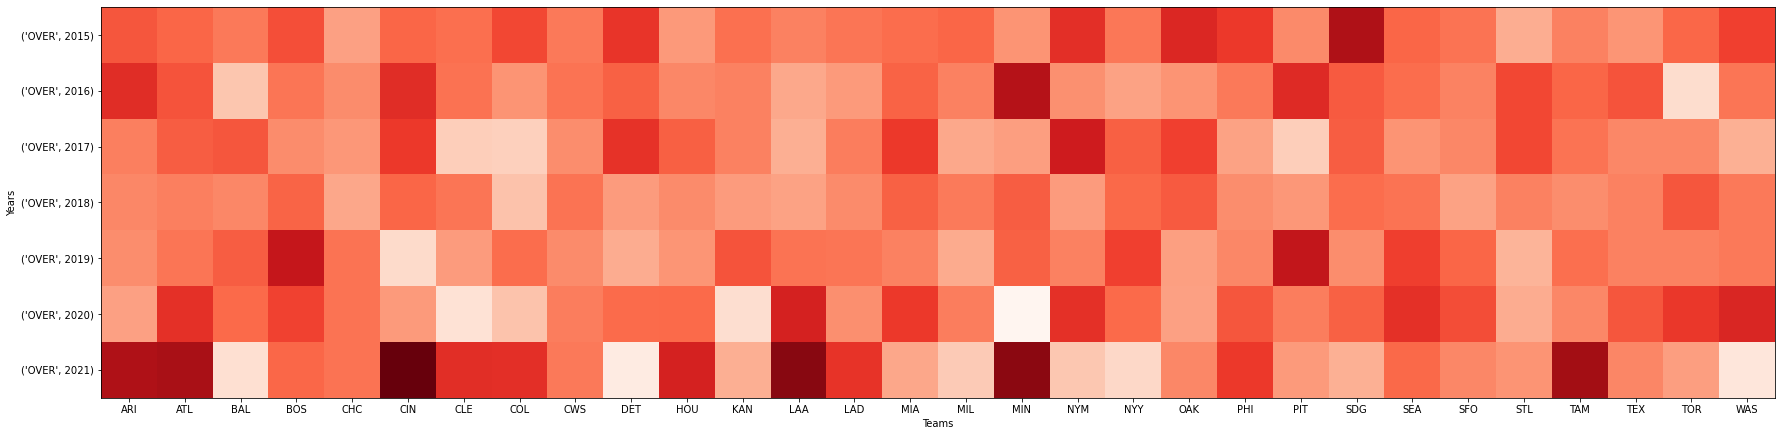

In [128]:
fig,ax=plt.subplots(figsize=(30,30))
indX=np.arange(teams_years.shape[0])
indY=np.arange(teams_years.shape[1])
im=ax.imshow(teams_years.transpose(),cmap='Reds')
ax.set_xlabel('Teams');
ax.set_ylabel('Years');
ax.set_xticks(indX);
ax.set_yticks(indY);
ax.set_yticklabels(teams_years.columns);
ax.set_xticklabels(teams_years.index);

In [121]:
odds_by_date=odds_data.groupby(['date'])['OVER'].agg(['mean'])
#odds_2015=odds_by_date[odds_by_date.year==2015]
#odds_2016=odds_by_data[odds_by_date.year==2016]
#odds_2017=odds_by_data[odds_by_date.year==2017]
#odds_2018=odds_by_data[odds_by_date.year==2018]
#odds_2019=odds_by_data[odds_by_date.year==2019]
#odds_2020=odds_by_data[odds_by_date.year==2020]
weeklies=odds_by_date.resample('W').mean()
weeklies.columns=['% Over']
weeklies['Overall Avg.']=odds_data.OVER.mean()
weeklies

,% Over,Overall Avg.
date,,
2015-04-05,0.000000,0.47139
2015-04-12,0.578458,0.47139
2015-04-19,0.499163,0.47139
2015-04-26,0.444270,0.47139
2015-05-03,0.515293,0.47139
...,...,...
2021-04-11,0.440999,0.47139
2021-04-18,0.438610,0.47139
2021-04-25,0.431803,0.47139


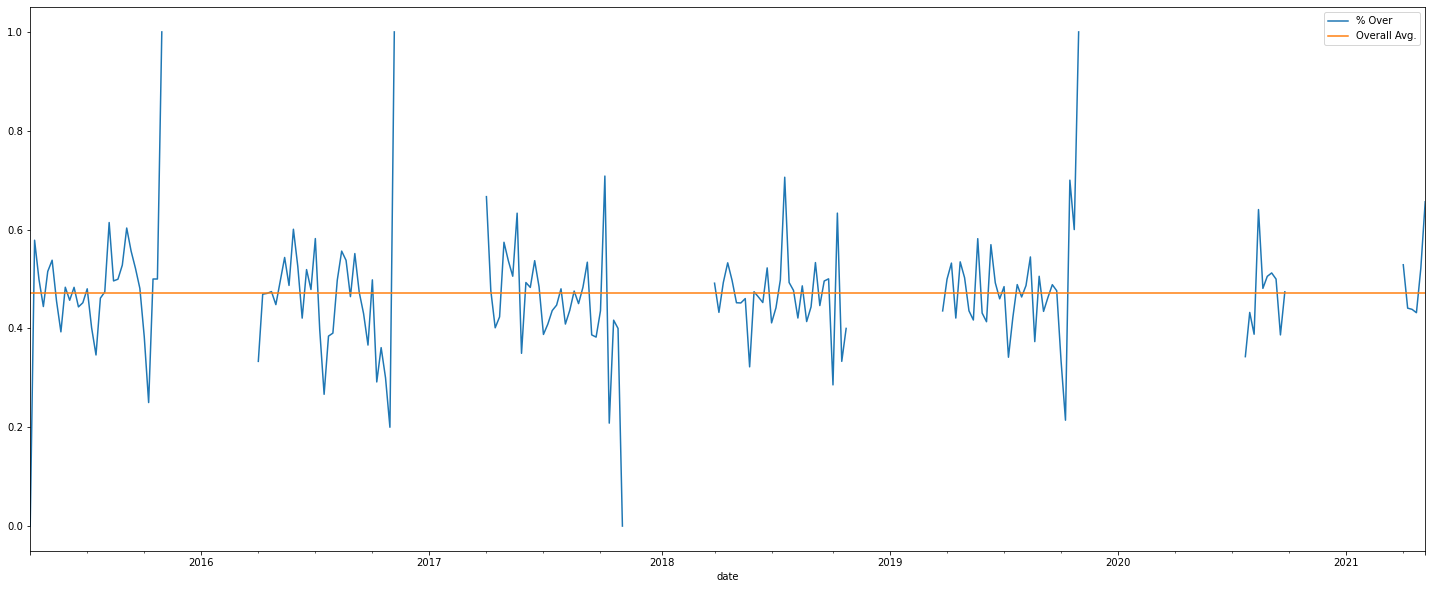

In [123]:
fig,ax=plt.subplots(figsize=(25,10))
weeklies.plot(ax=ax);

In [124]:
D20=odds_by_date.resample('20D').mean()
D20.columns=['% Over']
D20['Overall Avg.']=odds_data.OVER.mean()
D20

,% Over,Overall Avg.
date,,
2015-04-05,0.477167,0.47139
2015-04-25,0.510214,0.47139
2015-05-15,0.460002,0.47139
2015-06-04,0.462917,0.47139
2015-06-24,0.429572,0.47139
...,...,...
2021-02-12,NaN,0.47139
2021-03-04,NaN,0.47139
2021-03-24,0.463835,0.47139


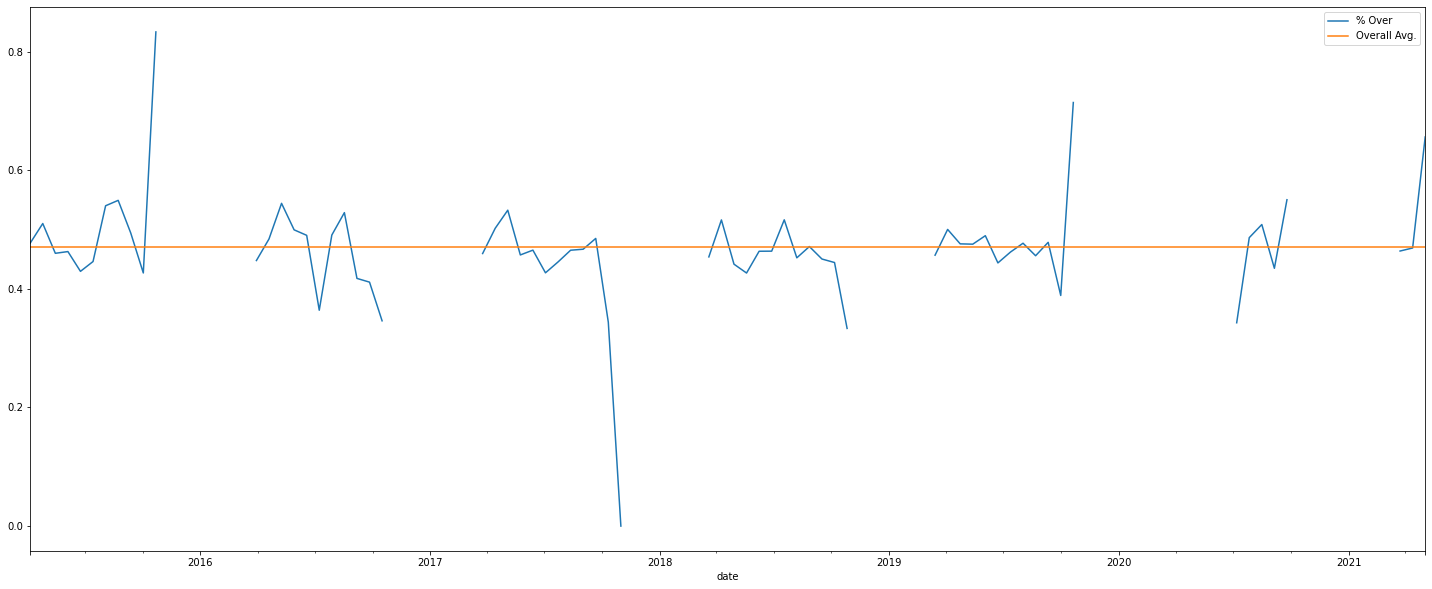

In [125]:
fig,ax=plt.subplots(figsize=(25,10))
D20.plot(ax=ax);

In [88]:
A=game_data.Away_Pitcher.value_counts()
H=game_data.Home_Pitcher.value_counts()
Pitchers=pd.concat([A,H],axis=1).fillna(0)
Pitchers['Total_Starts']=Pitchers.Away_Pitcher+Pitchers.Home_Pitcher
Pitchers=Pitchers.reset_index(level=1)

In [89]:
def get_experience(game):
    away_exp=Pitchers.loc[game.Away_Pitcher[0]].Total_Starts
    home_exp=Pitchers.loc[game.Home_Pitcher[0]].Total_Starts
    return away_exp+home_exp

In [90]:
game_data['pitcher_observations']=game_data.apply(get_experience,axis=1)
game_data.pitcher_observations.value_counts()

173.00    103
171.00     94
158.00     85
169.00     83
184.00     81
         ... 
9.00        2
11.00       2
12.00       2
8.00        1
312.00      1
Name: pitcher_observations, Length: 311, dtype: int64

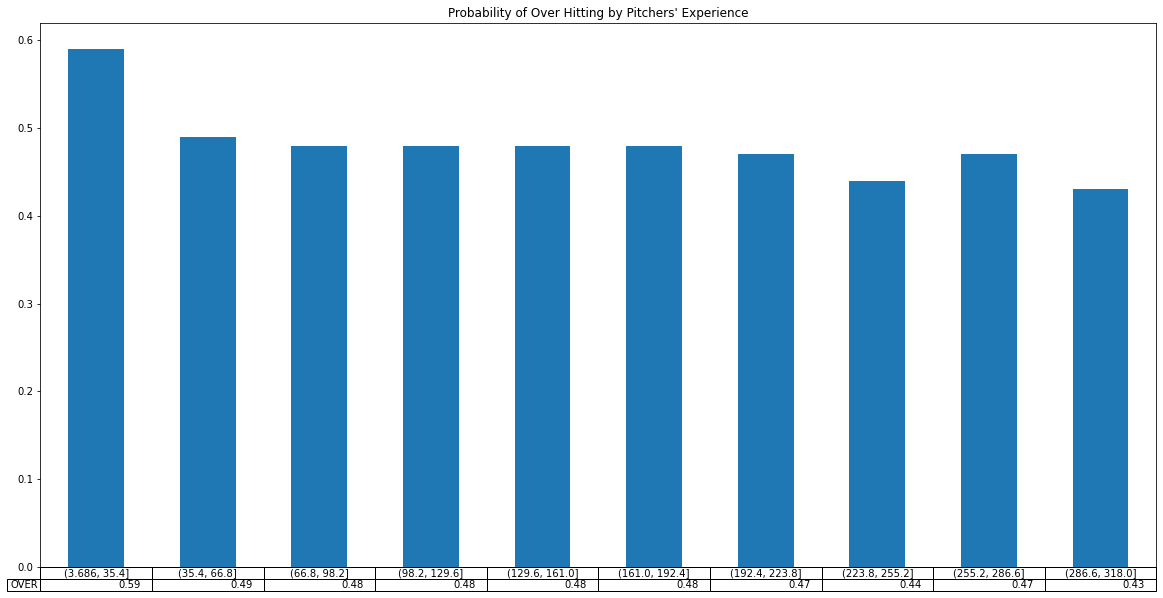

In [91]:
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Probability of Over Hitting by Pitchers\' Experience')

buckets=pd.cut(game_data.pitcher_observations,10)
avgs=game_data.OVER.groupby(buckets).mean()
cell_text=[str(a) for a in avgs]
ax.xaxis.set_visible(False)

avgs.apply(lambda x:round(x,2)).plot.bar(ax=ax,table=True);

It does appear that when the starting pitchers are less experienced, the OVER has a higher chance of hitting.  This makes sense considering the odds-maker would have fewer observations to base their expectations.  It also might be explained by the fact that less-experienced pitchers are more likely to give up more runs.